## FURTHER ANALYSIS TO ANSWER  KEY QUESTIONS

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\Jatin\Documents\05-05-InstaCartBasketAnalysis'

In [3]:
df=pd.read_pickle(os.path.join(path,'2 Data','Prepared Data','df_final.pkl'))

In [4]:
pd.options.display.max_columns=None

In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,reordered,product_name,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_frequency,customer,gender,state,age,date_joined,marital_status,income,total_depandants,region,activity_of_customer,age_flag,department,income_flag,family_flag
0,2539329,1,1,2,8,NaN,196,0,Soda,7,9,Mid range product,Regularly busy,Regular days,Average orders,10,New Customer,6.367188,Low Spender,20.5,Non frequent customer,Female,Alabama,31,2/17/2019,married,40423,3,South,High order customer,Young adult,beverages,Low income,Family
1,2398795,1,2,3,7,15.0,196,1,Soda,7,9,Mid range product,Regularly busy,Slowest days,Average orders,10,New Customer,6.367188,Low Spender,20.5,Non frequent customer,Female,Alabama,31,2/17/2019,married,40423,3,South,High order customer,Young adult,beverages,Low income,Family
2,473747,1,3,3,12,21.0,196,1,Soda,7,9,Mid range product,Regularly busy,Slowest days,Most orders,10,New Customer,6.367188,Low Spender,20.5,Non frequent customer,Female,Alabama,31,2/17/2019,married,40423,3,South,High order customer,Young adult,beverages,Low income,Family
3,2254736,1,4,4,7,29.0,196,1,Soda,7,9,Mid range product,Least busy,Slowest days,Average orders,10,New Customer,6.367188,Low Spender,20.5,Non frequent customer,Female,Alabama,31,2/17/2019,married,40423,3,South,High order customer,Young adult,beverages,Low income,Family
4,431534,1,5,4,15,28.0,196,1,Soda,7,9,Mid range product,Least busy,Slowest days,Most orders,10,New Customer,6.367188,Low Spender,20.5,Non frequent customer,Female,Alabama,31,2/17/2019,married,40423,3,South,High order customer,Young adult,beverages,Low income,Family


### Q: what are the busiest days of the week and hours of the day?
These analysis has already been performed in Task 9.
Top three busiest days of the week are: Saturday, Sunday and Friday
Top hours of the day are: 10,11,14



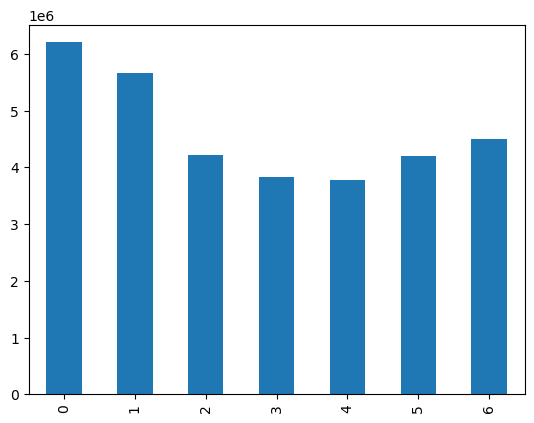

In [8]:
busiest_day=df['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [9]:
busiest_day.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','bar_busiest_day_of_week.png'))

###  Q:Are there particular times of the day when people spend the most money?


In [6]:
# total price spend according to hour of the day
busiest_hours_price=df.groupby('order_hour_of_day').agg({'prices':['sum']})
busiest_hours_price = busiest_hours_price.sort_values(by=('prices', 'sum'), ascending=False)
busiest_hours_price

,prices
,sum
order_hour_of_day,
10,20192878
11,20066570
14,19804273
15,19614177
13,19571197
12,19250352
16,18672404
9,17954772


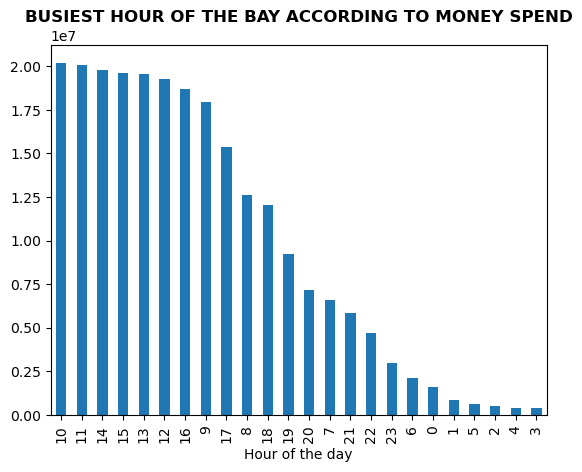

In [7]:
# create a bar plot
bar_busiest_hours_price=busiest_hours_price.plot.bar(legend=None)
plt.title('BUSIEST HOUR OF THE BAY ACCORDING TO MONEY SPEND',fontweight='bold')
plt.xlabel('Hour of the day')
plt.show()

10,11,14 are top three busiest hours of day.

In [8]:
# to export this viz
bar_busiest_hours_price.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','bar_busiest_hours_price.png'))

### Q:Are there products purchased by customer grouped with different price range to help marketing and sales?

In [9]:
df['price_range_loc'].value_counts()

Mid range product     21860860
Low range product     10126321
High range product      417678
Name: price_range_loc, dtype: int64

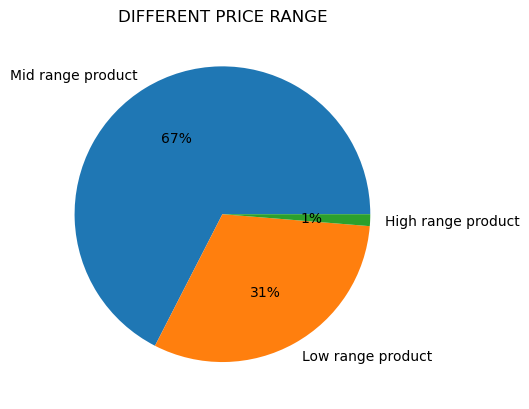

In [10]:
range_product=df['price_range_loc'].value_counts().plot.pie(title='DIFFERENT PRICE RANGE',label='',autopct=('%1.f%%'))

In [11]:
range_product.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','pie_price_range.png'))

### Q:Are there certain types of products that are more popular than others? Which departments have the highest frequency of product orders?


In [12]:
df['department'].value_counts(dropna=False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

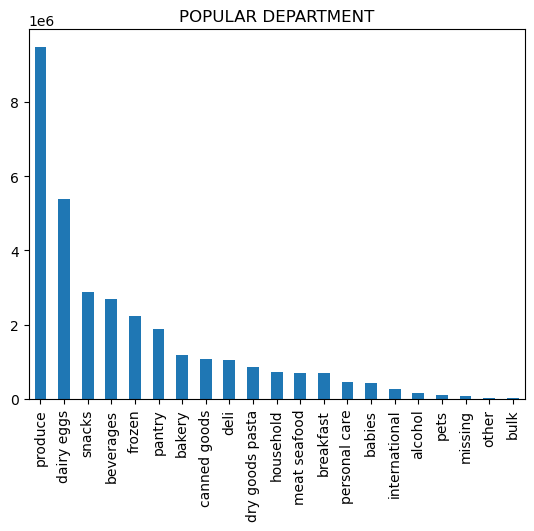

In [13]:
popular_products=df['department'].value_counts(dropna=False).plot.bar()
plt.title('POPULAR DEPARTMENT')
plt.show()

In [14]:
# export the plot
popular_products.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','popular_products.png'))

###  Q:What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?


In [15]:
df['loyalty_flag'].value_counts(dropna=False)

Regular Customer    15876776
Loyal Customer      10284093
New Customer         6243990
Name: loyalty_flag, dtype: int64

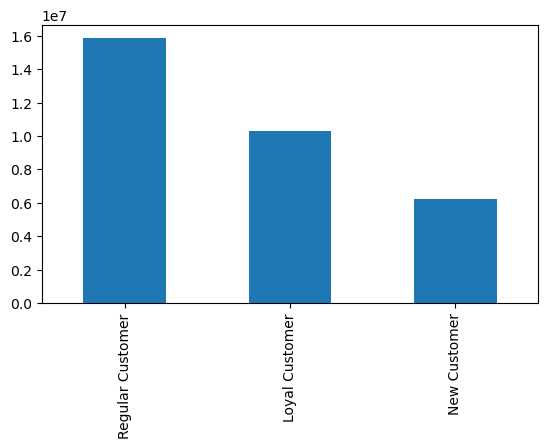

In [16]:
loyal_customer=df['loyalty_flag'].value_counts().plot.bar()
plt.subplots_adjust(bottom=0.3) #adjust margins

In [17]:
# export the plot
loyal_customer.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','loyal_customer.png'))

### Q:Are there differences in ordering habits based on a customer’s loyalty status?

In [10]:
# creating a crosstab between loyalty_flag and department-normalized
loyalty_department_1=pd.crosstab(index=df['department'],columns=df['loyalty_flag'],normalize='index')

In [12]:
 # creating second crosstab to put labels on chart
loyalty_department_2=pd.crosstab(index=df['department'],columns=df['loyalty_flag'])


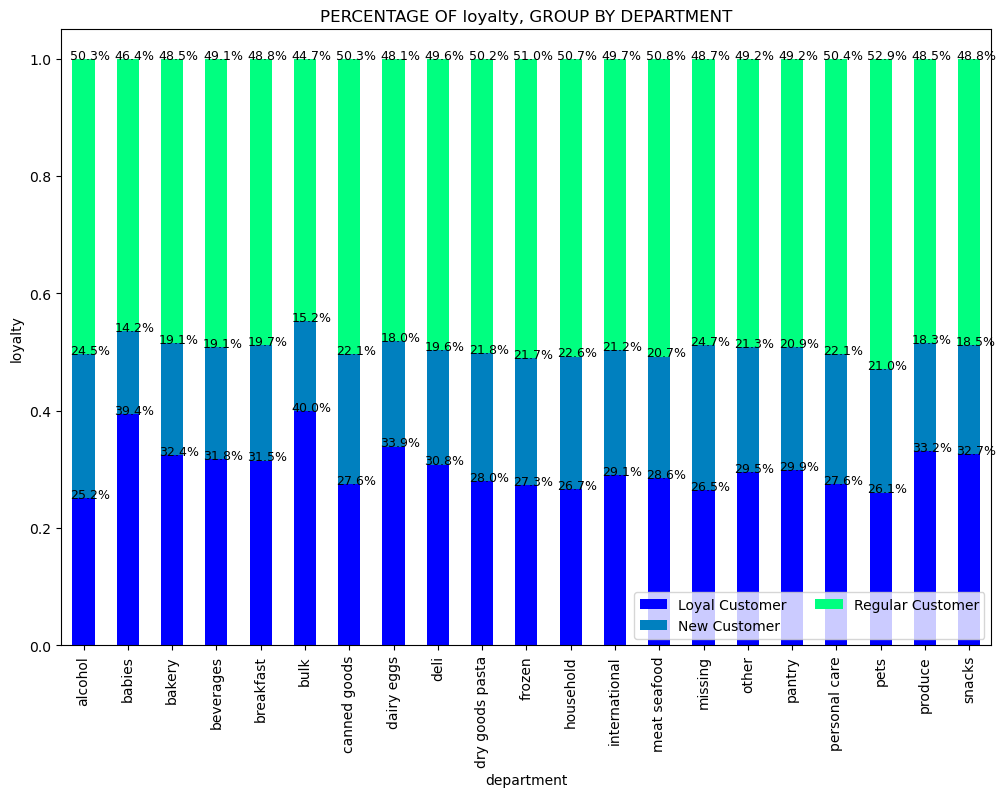

In [15]:
# normalize bar chart of loyalty, group by department
stacked_loyalty_department = loyalty_department_1.plot(kind='bar', stacked=True, colormap='winter', figsize=(12, 8))
plt.title('PERCENTAGE OF loyalty, GROUP BY DEPARTMENT')
plt.legend(loc='lower right', ncol=2)
plt.xlabel('department')
plt.ylabel('loyalty')

for n, x in enumerate([*loyalty_department_2.index.values]):
    for proportion, y_loc in zip(loyalty_department_1.loc[x], loyalty_department_1.loc[x].cumsum()):
        plt.text(x=n - 0.30,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color='black',
                 fontsize=9)

plt.show()

In [16]:
# export the plot
stacked_loyalty_department.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','loyalty_department.png'))

### Q:Are there differences in ordering habits based on a customer’s region?

In [17]:
# creating a crosstab between customer's region and department-normalized
region_department_1=pd.crosstab(index=df['department'],columns=df['region'],normalize='index')

In [18]:
 # creating second crosstab to put labels on chart
region_department_2=pd.crosstab(index=df['department'],columns=df['loyalty_flag'])


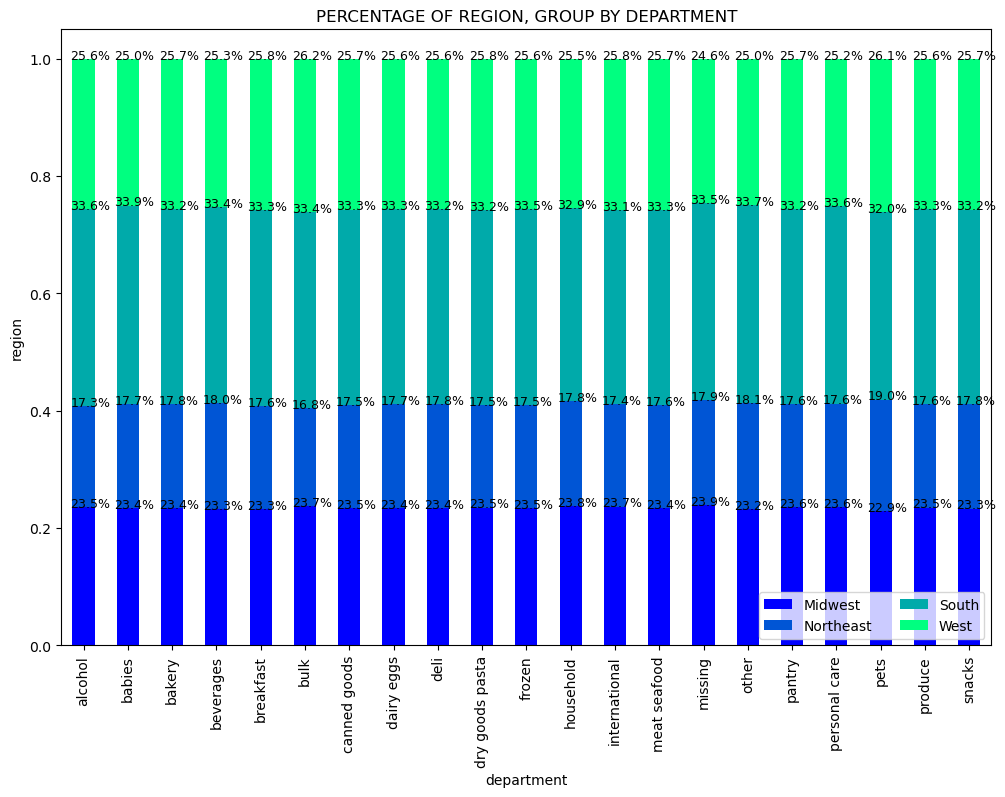

In [19]:
# normalize bar chart of region, group by department
stacked_region_department = region_department_1.plot(kind='bar', stacked=True, colormap='winter', figsize=(12, 8))
plt.title('PERCENTAGE OF REGION, GROUP BY DEPARTMENT')
plt.legend(loc='lower right', ncol=2)
plt.xlabel('department')
plt.ylabel('region')

for n, x in enumerate([*region_department_2.index.values]):
    for proportion, y_loc in zip(region_department_1.loc[x], region_department_1.loc[x].cumsum()):
        plt.text(x=n - 0.30,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%',
                 color='black',
                 fontsize=9)

plt.show()

In [20]:
# export the plot
stacked_region_department.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','region_department.png'))

### Q:Classification based on certain type of goods

In [26]:
df.loc[df['department_id']==18,'Profile']='Customers with babies'
df.loc[df['department_id']==8,'Profile']='Customers with pets'
df.loc[df['department_id']==12,'Profile']='Customers who eat meat'
df.loc[~df['department_id'].isin([8,12,18]),'Profile']='Customers with other product'

In [27]:
df['Profile'].value_counts(dropna=False)

Customers with other product    31174414
Customers who eat meat            708927
Customers with babies             423802
Customers with pets                97716
Name: Profile, dtype: int64

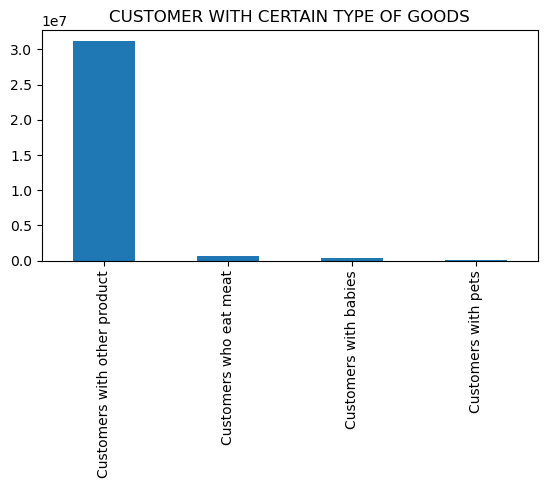

In [28]:
profile=df['Profile'].value_counts(dropna=False).plot.bar(title='CUSTOMER WITH CERTAIN TYPE OF GOODS')
plt.subplots_adjust(bottom=0.4) #adjust margins

In [29]:
# export the plot
profile.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','profile.png'))